# Introduction and Analysis

Introduction

As Machine Learning Modeling is being used to create various predictions, in this analysis the focus is to predict low birthweight depending on different provided features. By training machine learning models to predict low birthweight, we strive to elevate the precision of predictions, thereby informing interventions that could enhance the well-being of our youngest and most vulnerable, since after analyzing which features affect the most the birthweight of babies, actionable insights are provided to improve unborn babies health. This is important because it is well known that a baby's health at the moment of being born affects their health in the future.



Analysis

1.	Are there any strong positive or strong negative linear (Pearson) correlations with birthweight? Answer this question based on the original, continuous form of birthweight. (minimum 5 sentences)
Considering that a strong correlation exists when the value is above 0.5 (positive or negative), the next features represented the highest correlation with birthweight:
•	Fage (father's age):  With a coefficient of -0.56, father´s age seems to have a moderately negative correlation with birthweight; suggesting that as the father's age increases, the birthweight tends to be lower, though other factors could also be influencing this relationship.
•	Feduc (father's education): shows a negative correlation of about -0.53 with birthweight, indicating that higher educational attainment of the father is slightly associated with lower birthweight. 
•	Meduc (mother's education): has a negative correlation coefficient with birthweight, around -0.69. 
•	Moth (mother's race other than black or white) has a high negative correlation with birthweight, approximately -0.71. This could suggest that mothers identified as belonging to other races may have lower birthweights in their babies, which could be due to various socio-economic or genetic factors.
•	Mwhte (if mother is white) shows a strong positive correlation with birthweight, about 0.91. This implies that being white is strongly associated with higher birthweight in this dataset.
It is important to highlight that although they correlate it does not mean causation and it should be investigated to understand other factors that affect these correlations. 

2.	Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight? Provide credible sources as necessary. (minimum 5 sentences)
Low birth weight has been defined by World Health Organization as weight at birth of less than 2500 grams (5.5 pounds). (World Health Organization) A low-birth-weight baby may be healthy even though he or she is small. But a low-birth-weight baby can also have many serious health problems. (Stanford Medicine) Low birth weight is most often caused by being born too early (premature birth). That means before 37 weeks of pregnancy. A premature baby has less time in the pregnant person's womb (uterus) to grow and gain weight. Much of a baby's weight is gained during the last weeks of pregnancy. (University of Rochester Medical Center)

3.	After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not? (minimum 5 sentences)
The transformation of birthweight into a categorical variable seems to have led to a reduction in the strength of the correlations.
With the continuous form of birthweight, a modest positive correlation with npvis (number of prenatal visits) and some negative correlations with fage (father's age) and meduc (mother's education) are seen. 
However, after the transformation into a categorical variable, the correlations with most variables are closer to zero, and the phi coefficients for categorical predictors are mostly zero. This could be due to the loss of granularity (loss of information) when converting a continuous variable to a binary one.

4.	Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these. (minimum 5 sentences per feature)
The most important features in the machine learning model were prenatal_care_index and mage (mother’s age).
Prenatal_care_index was engineered with npvis (number of prenatal visits) and monpre (month of pregnancy where prenatal care started). This feature was created to create an index that combines the when the prenatal care began, and the total number of visits to analyze if the start of prenatal care combined with the number of prenatal visits might indicate better overall prenatal care and represent influence on the birthweight. With the obtained result, parents should be moved to take care of their babies once they know they are pregnant so that the probability of a baby having low birthweight is decreased. 
Mother’s age which is known that is strongly known that maternal age is strongly associated with a decreased neonatal birth weight, implying complications in early pregnancy and the antenatal period as well as obstetric complications. Because of this, parents should take into consideration their age to have the kids in the proper time, which is considered to be between 25 and 35 years. (Agnieszka Genowska, Radosław Motkowski, Vaiva Strukcinskaite,3 Paweł Abramowicz, and Jerzy Konstantynowicz, 26) As women age, so do your ovaries and the eggs inside them. 

5.	Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error. (minimum 5 sentences)
Considering Kaggle’s scoring of 1, the best model is the one with the following confusion matrix results:

True Negatives: 74
False Positives: 9
False Negatives: 20
True Positives: 0

Nevertheless, by using the precision formula, since there are no true positives the precision of the second model would be 0. Furthermore, considering other Kaggle Submission in which the scoring was 0.5, the precision of the model is 1.0, having 19 True positives. 

True Negatives: 83
False Positives: 0
False Negatives: 1
True Positives: 19

This model shows superiority as it has perfect precision (1.0), meaning there are no false positives, and every instance it predicted as positive was indeed positive. This is significant because it indicates that when the model predicts low birthweight, it is extremely accurate, even though it missed one case (false negative). 

Because the most important error is False Negatives to control, the objective is to minimize the risk of not detecting low birthweight the second returns significantly fewer false negatives. 

In conclusion, based on precision and considering what false negatives mean, the second confusion matrix represents a better-performing model.



# Imports and Data Check

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik as phik
import statsmodels.formula.api as smf

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression


# preprocessing and testing
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # s tandard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)


# model preparation
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.model_selection import RandomizedSearchCV # hp tuning


# model results
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# machine learning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# Loading data
train_data = "/Users/soniasorto/Desktop/Hult/Spring/Introduction to Machine Learning/A2 Individual/predicting-birthweight-fy-spring-2024/birthweight.csv"

# Birthweight train data

df_train = pd.read_csv(train_data, index_col = 'bwt_id')




# Reading testing data into Python
test_data = "/Users/soniasorto/Desktop/Hult/Spring/Introduction to Machine Learning/A2 Individual/predicting-birthweight-fy-spring-2024/kaggle_test_data.csv"

# Calling this df_test
df_test = pd.read_csv(test_data, index_col = 'bwt_id')


In [2]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
bwt_id,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle


# Exploratory Data Analysis (EDA) and Data Preprocessing (DP)

In [3]:
# Counting null values and learning to which features they belong

null_counts = df_full.isnull().sum()

print(null_counts)


mage       0
meduc      6
monpre     0
npvis     21
fage       1
feduc     10
omaps      2
fmaps      2
cigs      33
drink     32
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64


In [4]:
#### Missing Value Imputations

#Imputating missing values for the meduc column
df_full['meduc'].fillna(0, inplace = True)

#Calculating mean
npvis_mean = df_full['npvis'].mean()

#Using the mean to impute missing values
df_full['npvis'].fillna(npvis_mean, inplace = True)

#Calculating mean
fage_mean = df_full['fage'].mean()

#Using the mean to impute missing values
df_full['fage'].fillna(fage_mean, inplace = True)

#Filling missing values with 0 
df_full['feduc'].fillna(0, inplace = True)

#Calculating median
omaps_median = df_full['omaps'].median()

#Filling missing values with the median
df_full['omaps'].fillna(omaps_median, inplace = True)

#Calculating median
fmaps_median = df_full['fmaps'].median()

#Filling missing values with the median
df_full['fmaps'].fillna(fmaps_median, inplace = True)

#Calculating mode
cigs_mode = df_full['cigs'].mode()[0]

#Filling missing values with the mode
df_full['cigs'].fillna(cigs_mode, inplace = True)

#Calculating mode
drink_mode = df_full['drink'].mode()[0]

#Filling missing values with the mode
df_full['drink'].fillna(drink_mode, inplace = True)


df_full.isnull().sum()


mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

In [5]:
## Descriptive Statistics analysis ##

df_full.info()
df_full.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, bwt_1 to bwt_468
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    473 non-null    int64  
 1   meduc   473 non-null    float64
 2   monpre  473 non-null    int64  
 3   npvis   473 non-null    float64
 4   fage    473 non-null    float64
 5   feduc   473 non-null    float64
 6   omaps   473 non-null    float64
 7   fmaps   473 non-null    float64
 8   cigs    473 non-null    float64
 9   drink   473 non-null    float64
 10  male    473 non-null    int64  
 11  mwhte   473 non-null    int64  
 12  mblck   473 non-null    int64  
 13  moth    473 non-null    int64  
 14  fwhte   473 non-null    int64  
 15  fblck   473 non-null    int64  
 16  foth    473 non-null    int64  
 17  bwght   409 non-null    float64
 18  set     473 non-null    object 
dtypes: float64(9), int64(9), object(1)
memory usage: 73.9+ KB


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,409.00
mean,29.78,13.51,2.21,11.54,32.17,13.57,8.23,8.95,1.09,0.02,0.51,0.87,0.07,0.05,0.88,0.07,0.05,3189.87
std,5.11,2.62,1.33,3.84,6.09,2.97,1.37,0.57,4.07,0.29,0.50,0.34,0.26,0.23,0.33,0.26,0.22,748.45
min,16.00,0.00,0.00,0.00,18.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,360.00
25%,26.00,12.00,1.00,10.00,28.00,12.00,8.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,2780.00
50%,30.00,13.00,2.00,12.00,32.00,14.00,9.00,9.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,3340.00
75%,33.00,16.00,3.00,12.00,36.00,16.00,9.00,9.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,3686.00
max,44.00,17.00,8.00,36.00,62.00,17.00,10.00,10.00,30.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5089.00


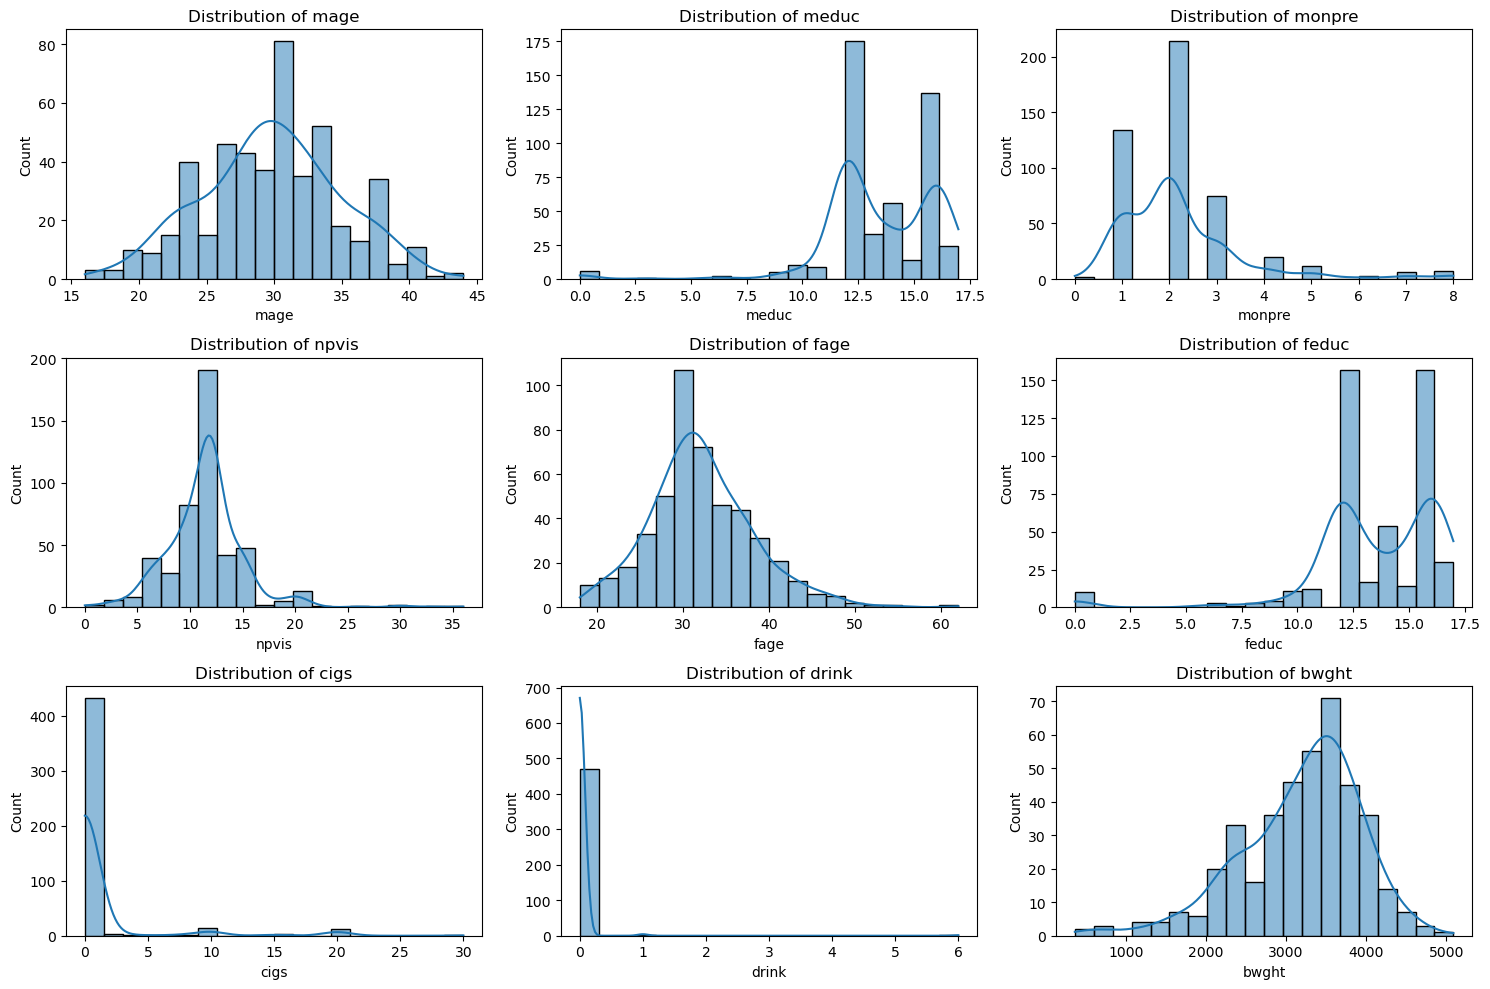

In [6]:
# Calculating distributions of continuous variables

continuous_vars = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'bwght']

# Set up the matplotlib figure (adjust figsize as needed)
plt.figure(figsize=(15, 10))

# Loop through the number of continuous variables
for i, var in enumerate(continuous_vars):
    # Create a subplot for each variable
    plt.subplot(3, 3, i+1)
    # Plot the distribution using seaborn
    sns.histplot(df_full[var], kde=True, bins=20)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

# Show the plots
plt.show()

The previous histograms were created in order to understand the data previous feature engineering. With this visualizations it was observed that there is a relatively normal distribution for mothers age and fathers age, and it is seen that there is a mode in which most women get pregnant at 30 years old. It can also be analyzed the distributions of the parents education. Also, it was created to analyze if cigarretes and drinking data was relevant for the study. Other important aspects to take into consideration were the distribution of number of visits and the month of pregnancy were the prenatal visits started With this information the feature engineers were able to being crafted.

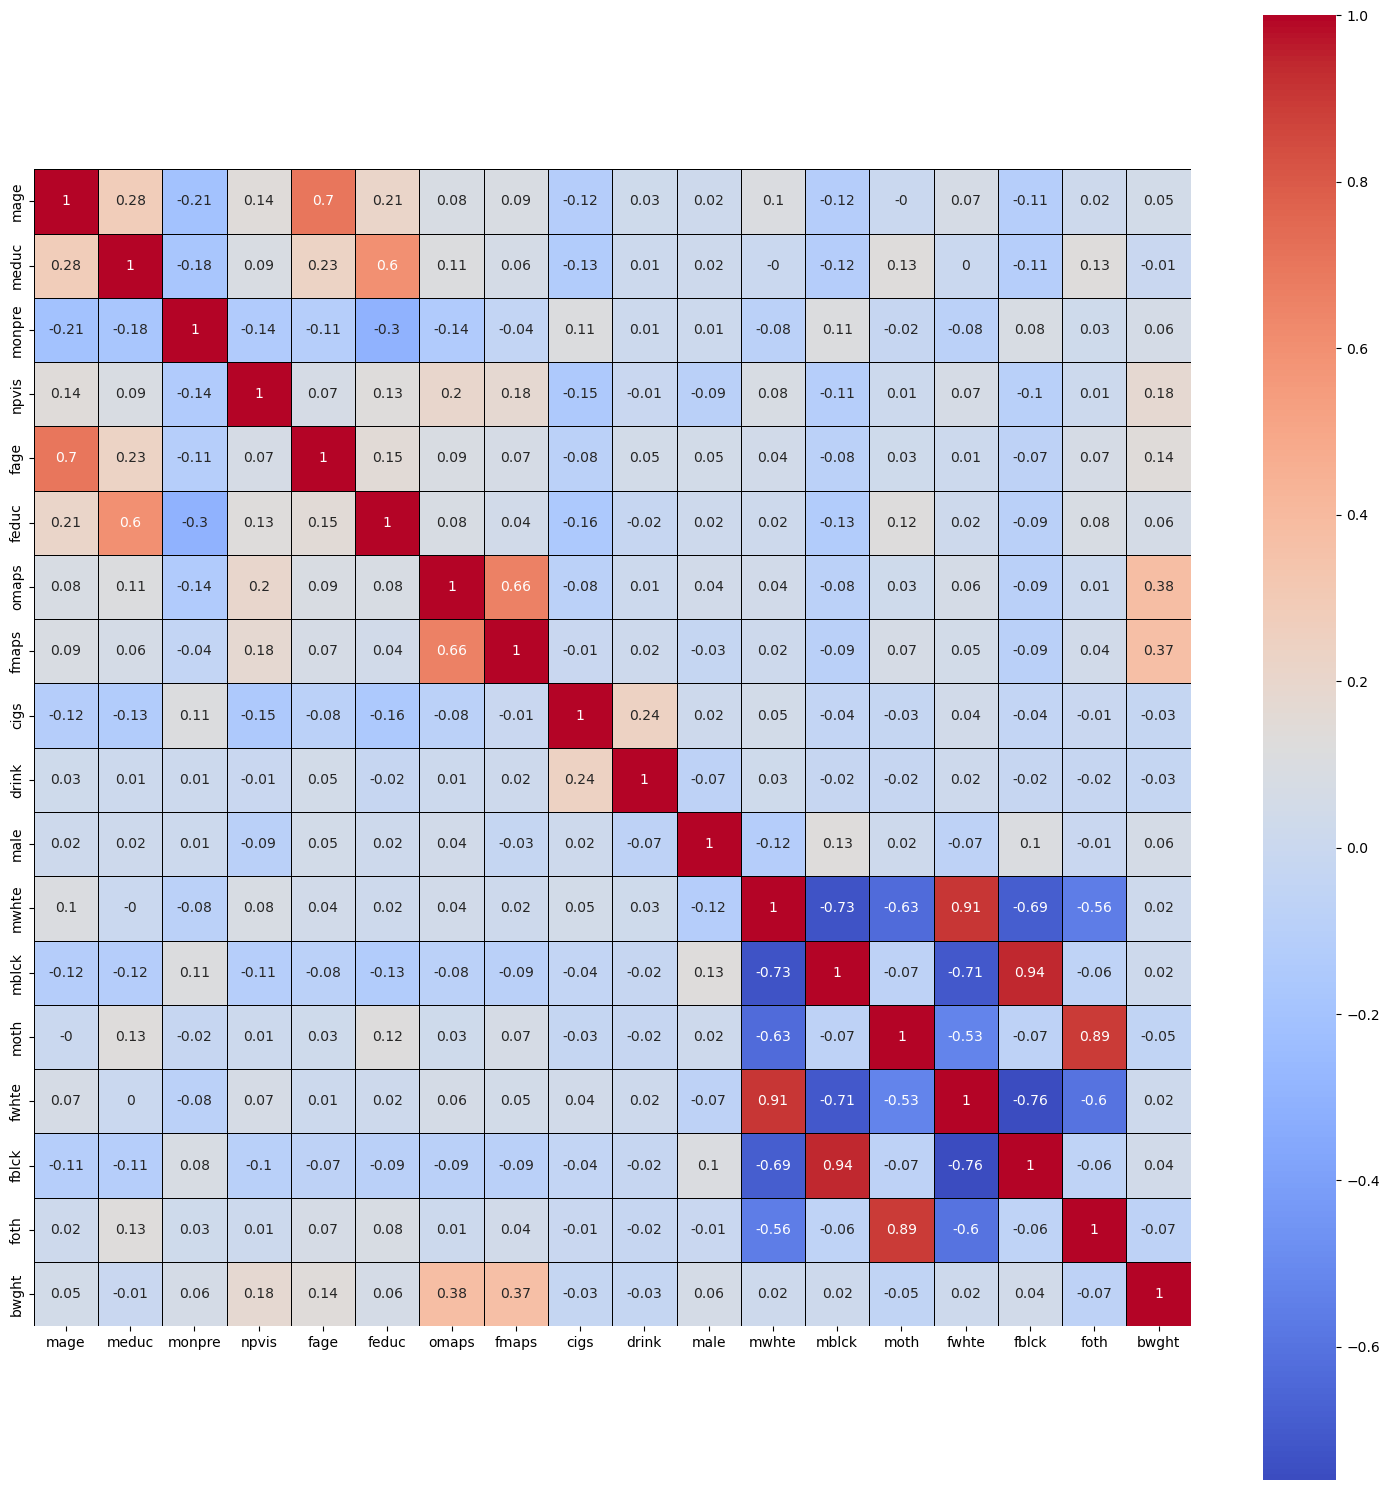

In [8]:
# instantiating a correlation matrix
df_corr = df_full[[ 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps',
       'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte',
       'fblck', 'foth', 'bwght']].corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

The previous heatmap was created in order to understand the data previous feature engineering. With this visualization it was observed that which features have better correlations with birthweight to analyze which feature engineers would have a bigger impact on the predictions. Also to understand if it would be good to remove some of the features to prevent overfitting of the model later in the process of predicting. it was observed that the features with more correlations with birthweight were npvis and fage, since omaps and fmaps are features that occur after the event (birth).

In [9]:
# Dropping fmaps and omaps which are considered after birth

df_full.drop(labels = ['omaps', 'fmaps'],
        axis = 1,
        inplace = True)

df_full.head(5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
bwt_id,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
bwt_2,21,0.0,1,6.0,21.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle


In [10]:
# creating feature sets
continuous     = [ 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc','cigs', 'drink', 'bwght']

non_continuous = ['male', 'mwhte', 'mblck', 'moth', 'fwhte','fblck', 'foth', 'bwght']


# pearson correlation
bw_corr = df_full[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
bw_phi_corr = df_full[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{bw_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{bw_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
bwght     1.0000
npvis     0.1788
fage      0.1386
feduc     0.0598
monpre    0.0551
mage      0.0546
meduc    -0.0055
drink    -0.0255
cigs     -0.0297
Name: bwght, dtype: float64


Phi Coefficients
----------------
bwght    1.0000
foth     0.1277
moth     0.1086
mwhte    0.1006
fwhte    0.0727
male     0.0376
mblck    0.0000
fblck    0.0000
Name: bwght, dtype: float64



# Feature Engineering

In [11]:
# Transforming bwght to categorical variable

df_full['low_bwght'] = (df_full['bwght'] < 2500).astype(int)

df_full.head()


,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght
bwt_id,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0
bwt_2,21,0.0,1,6.0,21.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle,1
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle,0


In [15]:
# creating feature sets
continuous     = [ 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc','cigs', 'drink', 'low_bwght']

non_continuous = ['male', 'mwhte', 'mblck', 'moth', 'fwhte','fblck', 'foth', 'low_bwght']


# pearson correlation
bw_corr = df_full[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
bw_phi_corr = df_full[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{bw_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{bw_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
low_bwght    1.0000
cigs         0.0495
meduc        0.0181
drink       -0.0103
feduc       -0.0187
mage        -0.0351
monpre      -0.0527
fage        -0.0791
npvis       -0.1175
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght    1.0000
mwhte        0.0181
male         0.0000
mblck        0.0000
moth         0.0000
fwhte        0.0000
fblck        0.0000
foth         0.0000
Name: low_bwght, dtype: float64



In [16]:
# Feature Engineer 1 - Prenatal Care Index

df_full['prenatal_care_index'] = df_full['npvis'] / df_full['monpre']

df_full.head(5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght,prenatal_care_index
bwt_id,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0,5.0
bwt_2,21,0.0,1,6.0,21.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle,1,6.0
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0,5.5
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0,20.0
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle,0,6.0


In [17]:
# Feature Engineer 2 - Parent Race Flag

df_full['parent_race_flag'] = ((df_full['mblck'] == 1) | 
                          (df_full['moth'] == 1) | 
                          (df_full['fblck'] == 1) |
                          (df_full['foth'] == 1)).astype(int)

df_full.head(5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght,prenatal_care_index,parent_race_flag
bwt_id,,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0,5.0,0
bwt_2,21,0.0,1,6.0,21.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle,1,6.0,0
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0,5.5,0
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0,20.0,1
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle,0,6.0,0


In [18]:
# Feature Engineer 3 - Combined Education 

df_full['comb_educ'] = (df_full['meduc'] + df_full['feduc'])/2

df_full.head(5)


,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,...,moth,fwhte,fblck,foth,bwght,set,low_bwght,prenatal_care_index,parent_race_flag,comb_educ
bwt_id,,,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,...,0,1,0,0,3317.0,Not Kaggle,0,5.0,0,14.5
bwt_2,21,0.0,1,6.0,21.0,0.0,0.0,0.0,0,1,...,0,1,0,0,1160.0,Not Kaggle,1,6.0,0,0.0
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,...,0,1,0,0,4706.0,Not Kaggle,0,5.5,0,15.5
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,...,1,0,0,1,3289.0,Not Kaggle,0,20.0,1,17.0
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,...,0,1,0,0,3490.0,Not Kaggle,0,6.0,0,15.5


In [19]:
df_full.isnull().sum()

mage                    0
meduc                   0
monpre                  0
npvis                   0
fage                    0
feduc                   0
cigs                    0
drink                   0
male                    0
mwhte                   0
mblck                   0
moth                    0
fwhte                   0
fblck                   0
foth                    0
bwght                  64
set                     0
low_bwght               0
prenatal_care_index     2
parent_race_flag        0
comb_educ               0
dtype: int64

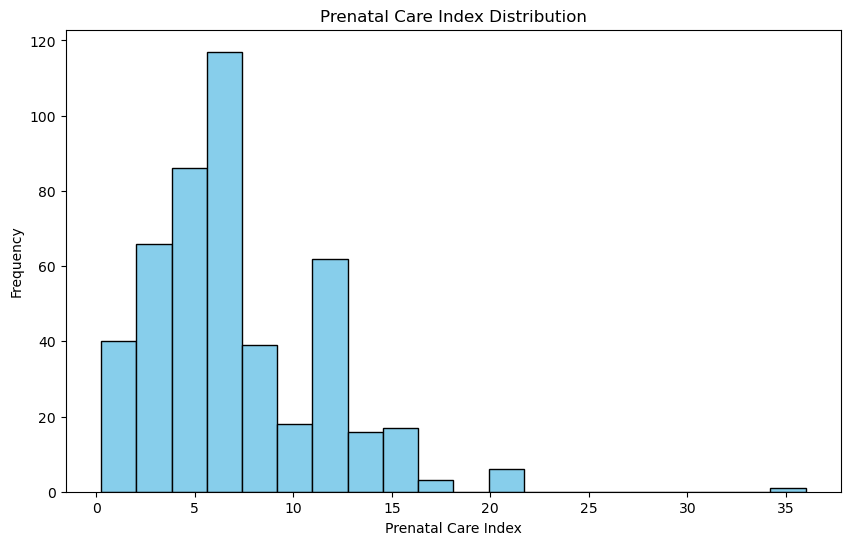

In [20]:
#Distribution of prenatal_care_index to impute values

plt.figure(figsize=(10, 6))
plt.hist(df_full['prenatal_care_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Prenatal Care Index Distribution')
plt.xlabel('Prenatal Care Index')
plt.ylabel('Frequency')
plt.show()

Prenatal Care Index Distribution was created to analyze how to impute missing values, either with median, mean or mode. From the visualization it was observed that it was better to use the median value for imputation since it would not take into consideration outliers.

In [21]:
pci_median = df_full["prenatal_care_index"].median()

df_full['prenatal_care_index'].fillna(pci_median, inplace = True)

df_full.isnull().sum()

mage                    0
meduc                   0
monpre                  0
npvis                   0
fage                    0
feduc                   0
cigs                    0
drink                   0
male                    0
mwhte                   0
mblck                   0
moth                    0
fwhte                   0
fblck                   0
foth                    0
bwght                  64
set                     0
low_bwght               0
prenatal_care_index     0
parent_race_flag        0
comb_educ               0
dtype: int64

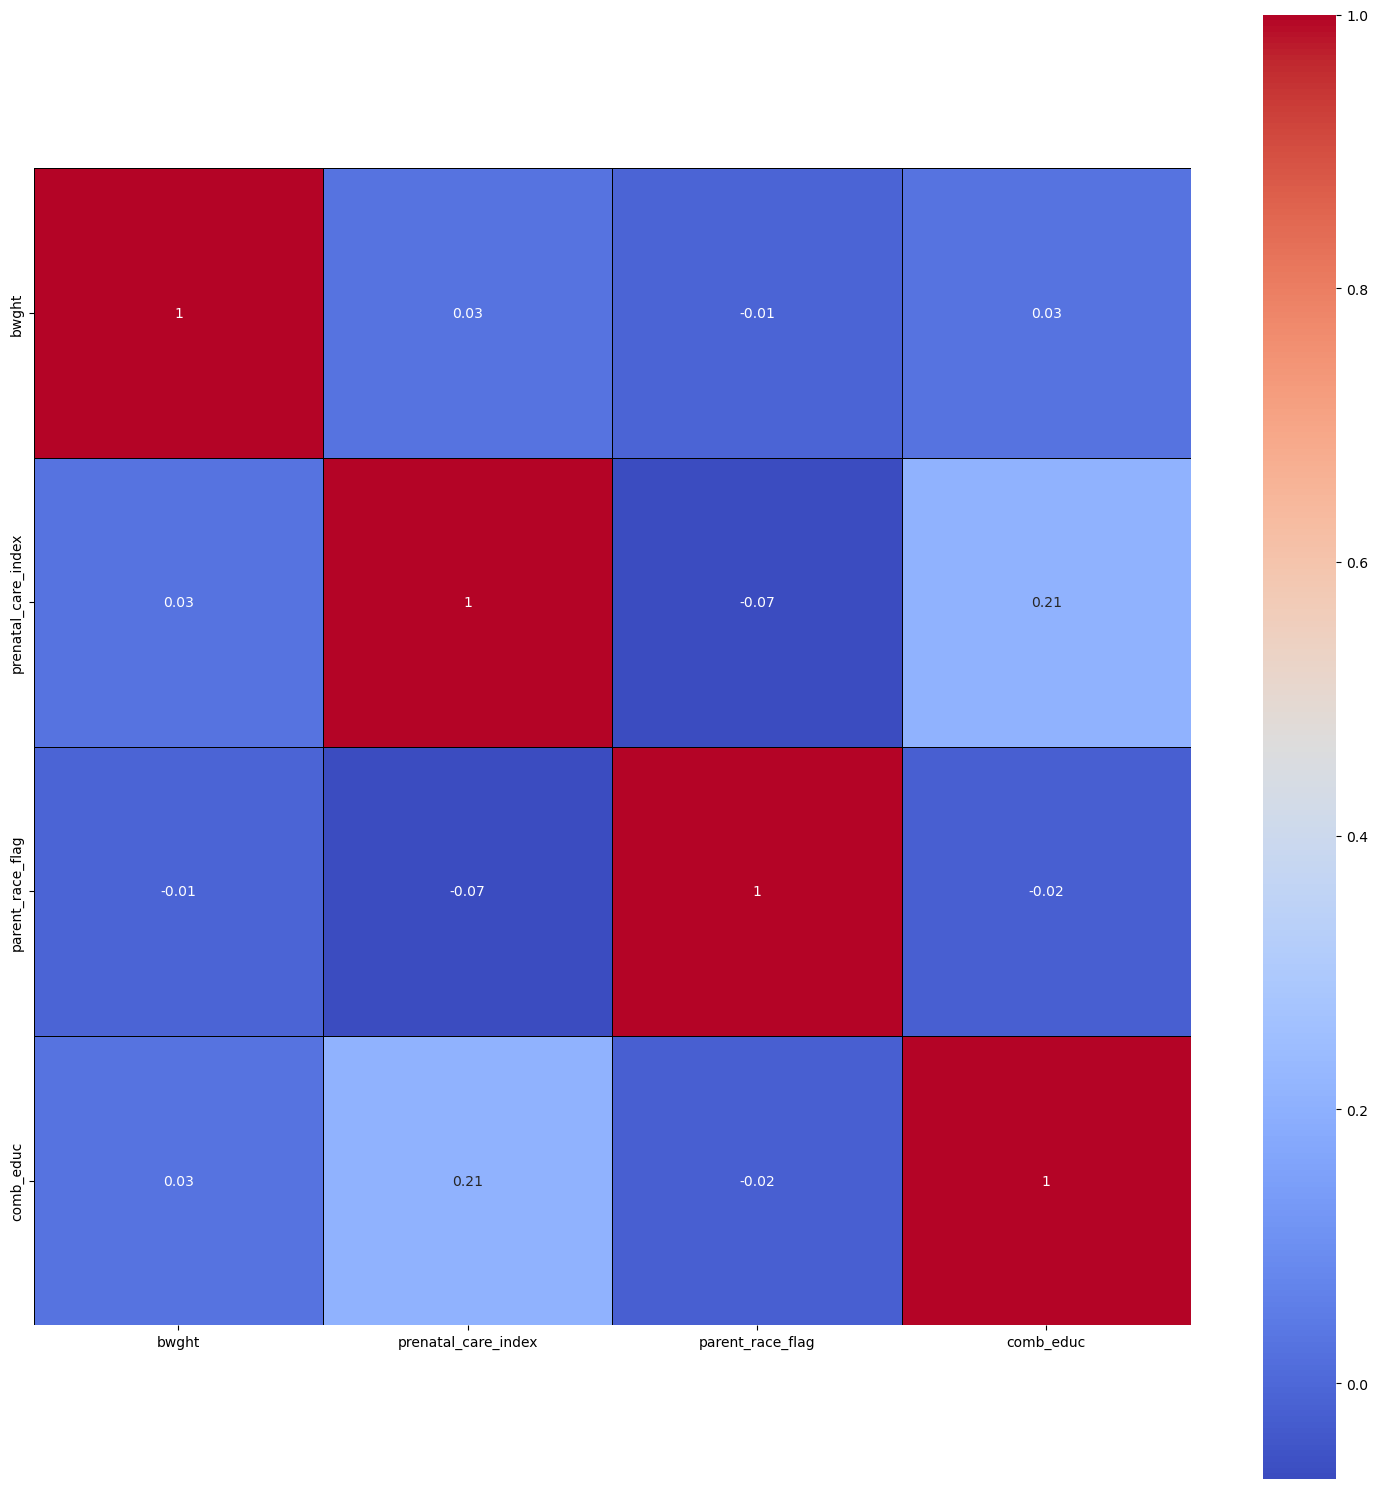

In [22]:
# instantiating a correlation matrix
df_corr = df_full[[ 'bwght','prenatal_care_index',
                   'parent_race_flag', 'comb_educ' ]].corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

The previous heatmap was created in order to understand the correlation between the features engineered and the birthweight. With this visualization it was observed that the feature that has better correlation with birthweight is prenatal_care_index, which is the index that takes into consideration the month were prenatal care started and the number of visits for prenatal care. 

# Data Partitioning

In [23]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True,
                )


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [24]:
# declaring explanatory variables
bw_data   = df[[ "mage", "meduc", "fage", "feduc", "cigs", "drink", "male", "mwhte",
                  "mblck", "moth", "fwhte", "fblck", "foth",'prenatal_care_index', 'parent_race_flag', 'comb_educ']]

# declaring response variable
bw_target = df['low_bwght']

# Standardizing

In [25]:


def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [26]:
# standardizing the x-features
x_data_st = standard_scaler(df = bw_data )


# checking results
x_data_st.head(n = 5)

,mage,meduc,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,prenatal_care_index,parent_race_flag,comb_educ
0,-0.361492,-0.569471,-0.202607,1.148583,-0.269856,-0.071442,-0.978232,0.381652,-0.281346,-0.238427,0.377436,-0.281346,-0.232645,-0.448704,-0.394167,0.380796
1,-1.728666,-5.158901,-1.836508,-4.646843,-0.269856,-0.071442,-0.978232,0.381652,-0.281346,-0.238427,0.377436,-0.281346,-0.232645,-0.217352,-0.394167,-5.492575
2,-0.556802,0.577887,-0.039217,0.807676,-0.269856,-0.071442,1.022252,0.381652,-0.281346,-0.238427,0.377436,-0.281346,-0.232645,-0.333028,-0.394167,0.785856
3,0.615061,1.342792,1.104513,1.148583,-0.269856,-0.071442,-0.978232,-2.620188,-0.281346,4.194152,-2.649454,-0.281346,4.298394,3.021574,2.536999,1.393446
4,0.029129,0.577887,0.614343,0.807676,-0.269856,-0.071442,1.022252,0.381652,-0.281346,-0.238427,0.377436,-0.281346,-0.232645,-0.217352,-0.394167,0.785856


In [27]:
# train/test split with standardized x-features
x_features_s  =  x_data_st
y_feature_s =  df['low_bwght']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            x_features_s,
            y_feature_s,
            random_state = 702,
            test_size    = 0.25,
            stratify     = y_feature_s)

In [28]:
from sklearn.model_selection import train_test_split # train-test split

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    bw_data,
    bw_target,
    test_size    = 0.25,
    random_state = 702,
    stratify     = bw_target  # Make sure to pass stratify as an argument to train_test_split
)

# merging training data for statsmodels
bw_train = pd.concat([x_train, y_train], axis = 1)

# Modeling

In [29]:
# INSTANTIATING the model object without hyperparameters
full_gbm_def = GradientBoostingClassifier(loss          = 'log_loss',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 702)


# FITTING to the training data
full_gbm_def_fit = full_gbm_def.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_def_pred = full_gbm_def_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(full_gbm_def_fit.score(x_train, y_train),
                                  ndigits = 4))
      
print('Testing ACCURACY :', round(full_gbm_def_fit.score(x_test, y_test),
                                  ndigits = 4))
      
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = full_gbm_def_pred),
                                  ndigits = 4))

Training ACCURACY: 0.8954
Testing ACCURACY : 0.7184
AUC Score        : 0.4458


In [30]:
# unpacking the confusion matrix
gbm_def_tn, \
gbm_def_fp, \
gbm_def_fn, \
gbm_def_tp = confusion_matrix(y_true = y_test, 
                              y_pred = full_gbm_def_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_def_tn}
False Positives: {gbm_def_fp}
False Negatives: {gbm_def_fn}
True Positives : {gbm_def_tp}
""")


True Negatives : 74
False Positives: 9
False Negatives: 20
True Positives : 0



In [31]:
# instantiating a hyperparameter space
learn_range        = [0.1, 0.3, 0.5]
estimator_range    = [100, 150, 200]
depth_range        = [3,5,8]
warm_start_range   = [True, False]


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 702)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 702,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(x_features_s, y_feature_s)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

/Users/soniasorto/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 54 is smaller than n_iter=500. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3}
Tuned Training AUC: 0.5214


In [32]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.3,
                                       max_depth     = 5,
                                       n_estimators  = 100,
                                       warm_start    = True,
                                       random_state  = 702)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(x_features_s, y_feature_s)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(gbm_tuned_fit.score(x_train, y_train),
                                  ndigits = 4))


print('Testing  ACCURACY:', round(gbm_tuned_fit.score(x_test, y_test),
                                  ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = gbm_tuned_pred),
                                  ndigits = 4))

Training ACCURACY: 0.8039
Testing  ACCURACY: 0.8058
AUC Score        : 0.5


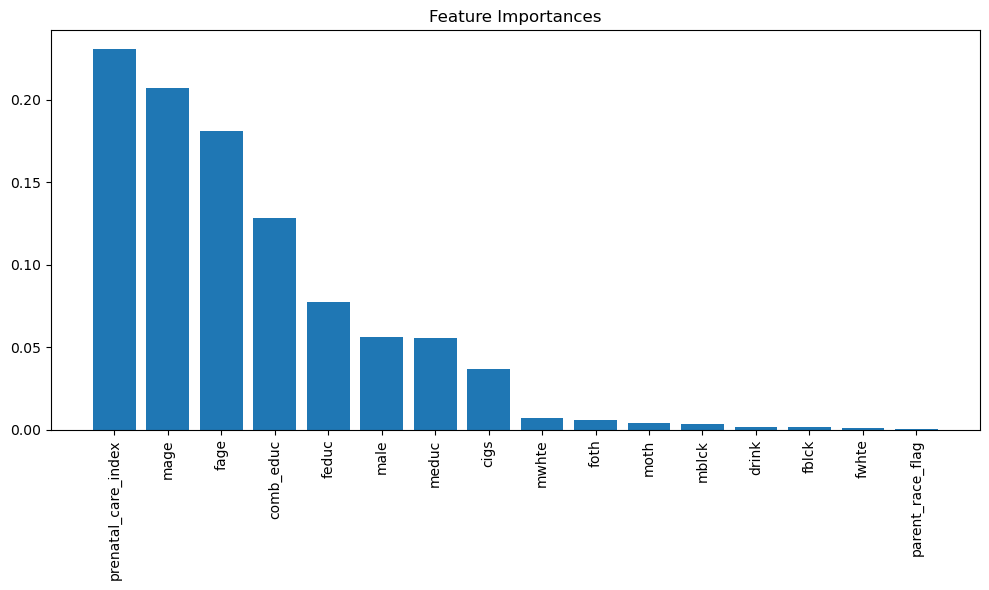

In [35]:
# Get the importance of x features with .feature_importances_ in the model
feature_importances = gbm_tuned_fit.feature_importances_

# Get the feature names
features = x_train.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting the bar graph
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), feature_importances[sorted_indices], align = "center")
plt.xticks(range(x_train.shape[1]), features[sorted_indices], rotation = 90)
plt.tight_layout()
plt.show()

The Feature Importances visualization was created to understand which features from the Machine Learning Model were the most important ones. In this one, it can be appreciated that the features were prenatal care index, which is an engineered feature, mother's age, father's age, combined education, which was another engineered feature, father education, ig the baby is a male and the mother education. It is insightful than the parent race flag was not important since from previously made investigation, it was understood that if the parents are white it is less probable that a baby can have a low weight, while if their parents are black or from other race it is more common. 


# Preparing Kaggle File

In [ ]:
x_features = [ "mage", "meduc", "fage", "feduc", "cigs", "drink", "male", "mwhte",
                  "mblck", "moth", "fwhte", "fblck", "foth", 'prenatal_care_index', 'parent_race_flag', 
              'comb_educ']

y_variable = "low_bwght"

In [ ]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = gbm_tuned.predict(x_data_kaggle)

In [ ]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

In [ ]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./test6(gbm).csv",
                     index       = True,
                     index_label = 'bwt_id')